# Computational Social Science Project #3 

**Enter your Name:** Regina Ebo 


*Semester:* Fall 2025

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

Let's visualize what the distribution of results looks like.

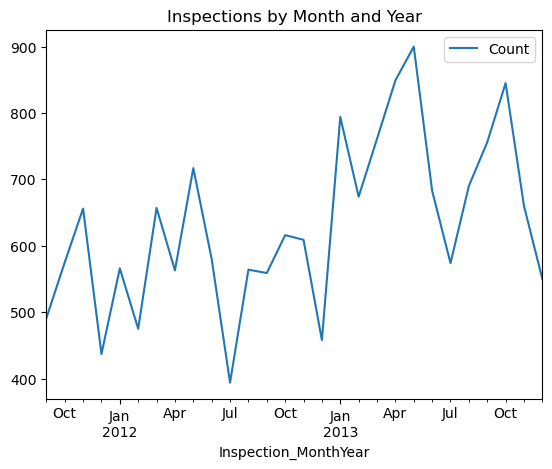

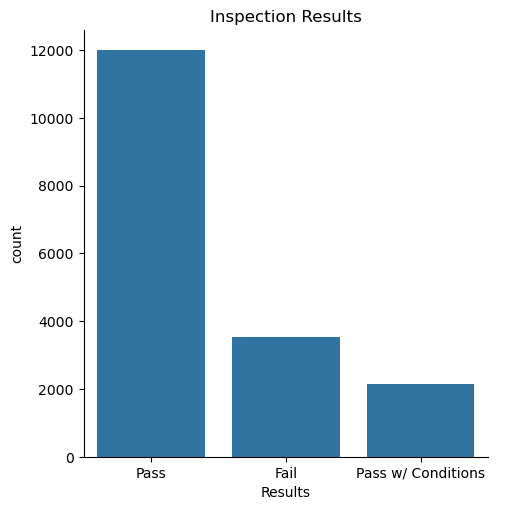

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

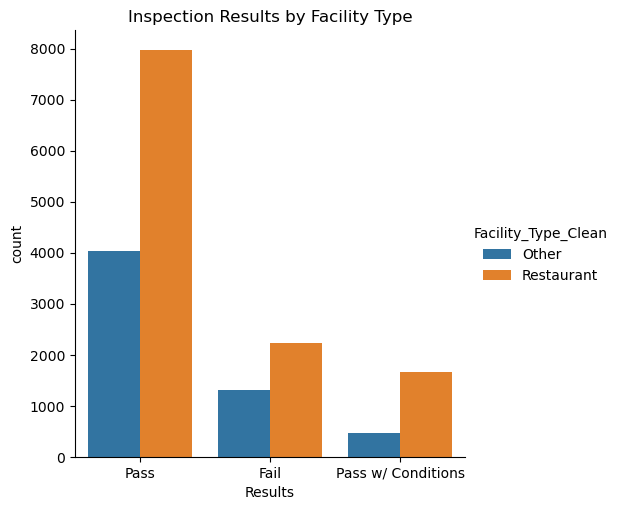

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset

X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [13]:
##Data Splitting
#load relevant library
from sklearn.model_selection import train_test_split
# Set seed
np.random.seed(10)


# training and test split 
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20,
                                                    stratify=y)

### Model 1: Random Forest

Random forest is a plausible model because it is efficient in that it doesn’t require much tuning and doesn’t require a lot of computing power. In addition, it is useful for more complicated data, such as food inspection data, where there may be multiple features that contribute to whether a business passes or fails a food inspection.
A random forest model creates multiple trees using a subset of features. It decorrelates the trees which means you won’t end up with the same feature split at the top of every tree you build. This helps reduce the likelihood of over-fitting that a more basic decision tree model/standard bagging method is more susceptible to. The trees are grown in parallel and a majority vote is taken to pick the winning one. One major con with random forests is the difficulty in interpretability. However, even with this con, it is still worthwhile to run this model due to the reasons I mentioned above.


In [14]:
#1. Import the appropriate library from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


#2. Set up a hyperparameter grid (check out our previous labs to see how to do this)

# First initialize a random forest classifier
rf_classifier = RandomForestClassifier( random_state = 10)    # random seed
## Then define hyperpararameter grid
rf_param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 0.5, 0.7],  # Number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees 
}
                               
#3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation) 
rf_grid_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=rf_param_dist, cv=5, n_iter=30, n_jobs=-1)
rf_model = rf_grid_search.fit(X_train, y_train.ravel())

best_rf_model = rf_grid_search.best_estimator_
print(rf_grid_search.best_params_)

/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/o

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 10, 'bootstrap': True}


###  Model 2: Adaptive Boosting/Ada Boost

Adaptive Boosting uses a sequential learning strategy, where weak learners are trained on errors. First all the data points have similar weights, then with each iteration, the algorithm learns from prior mistakes and assigns larger weights to data points that have been misclassified. Due to its focus on error, adaptive Boosting is useful for identifying edge cases or anomalies that might not be identified by other methods. This could be helpful for food inspection data as it may be able to correctly identify edge case violations. This strength of adaptive boosting however, can also function as a con as its sensitivity to edge cases/outliers can make it more vulnerable to overfitting. It can also have less than optimal performance in highly noisy data. However, the fact that it learns from prior mistakes still makes it a worthwhile classification model for a complicated data set like this one. 

In [15]:
#1. Import the appropriate library from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
#First #define base estimator
base_tree = DecisionTreeClassifier()

#Then initialize an adaboost classifier
ada_classifier = AdaBoostClassifier(estimator =base_tree, n_estimators=100)


Ada_param_dist = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1.0],  # Weight applied to each classifier at each boosting iteration
    'algorithm': ['SAMME', 'SAMME.R']  # Boosting algorithm (get a message that this is deprecated)
}

#3. Find the best hyperparameters, and then fit your model
Ada_grid_search = RandomizedSearchCV(estimator=ada_classifier, param_distributions=Ada_param_dist, cv=5, n_iter=30, n_jobs=-1)
Ada_model = Ada_grid_search.fit(X_train, y_train.ravel())

best_Ada_model = Ada_grid_search.best_estimator_
print(Ada_grid_search.best_params_)

/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.p

{'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME'}


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


### Model 3: XGBoost

XGBoost is an extreme form of gradient boosting that learns from residual errors. It employs a sequential strategy (allowing weak learners to train the models) and tries to predict where the model has done poorly in the past. In addition, it minimizes the loss function. This aspect sets it apart from adaptive boosting. Some cons of XGBoost include the fact you need to tune the hyperparameters; it is computationally complex; and can be computationally expensive to train (this is particularly the case for very large datasets). XGBoost has been described as “a combination of the best aspects of each of the other models.” In addition, XGBoost handles imbalance and missing data pretty well. Food inspection data is likely to be imbalanced and have missing values. These reasons make it a plausible model for the food inspection data. 

In [16]:
#1. Import the appropriate library from sklearn
import xgboost as xgb

#2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
# First initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)

xgb_param_dist = {
    'n_estimators': [100, 200, 300, 500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7, 9], 
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}

#3. Find the best hyperparameters, and then fit your model
xgb_grid_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=xgb_param_dist, cv=5, n_iter=30, n_jobs=-1)
xgb_model = xgb_grid_search.fit(X_train, y_train.ravel())

best_xgb_model = xgb_grid_search.best_estimator_
print(xgb_grid_search.best_params_)


{'subsample': 0.9, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 1.0}


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

**Answer**: I will be examining the following metrics: accuracy, precision, recall, and F1 score.
For predictive auditing in the context of food inspection violations, I would prioritize recall. 
This is because the recall lets us know how many real violations we correctly identify and minimizes the false negatives. Not being able to correctly identify establishments that are in violation can result in health and safety concerns for the public (such as the spread of foodborne illnesses).




In [18]:
#load relevant models 
from sklearn.model_selection import cross_validate, cross_val_score
models = {
    "Random Forest Classifier": best_rf_model, 
    "AdaBoost" : best_Ada_model,
    "XGBoost": best_xgb_model
}

# Define the scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Iterate through each model
for model_name, model in models.items():
    print(f"--- Evaluating {model_name} ---")
    # Iterate through each scoring metric
    for metric in scoring_metrics:
        scores = cross_val_score(model, X, y, cv=5, scoring=metric)
        print(f"Average {metric}: {np.mean(scores):.4f}")
    print("\n")

--- Evaluating Random Forest Classifier ---
Average accuracy: 0.9262
Average precision: 0.7624
Average recall: 0.9223
Average f1: 0.8344


--- Evaluating AdaBoost ---


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.p

Average accuracy: 0.8960


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Average precision: 0.7544


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.p

Average recall: 0.7185


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Average f1: 0.7328


--- Evaluating XGBoost ---
Average accuracy: 0.9282
Average precision: 0.7709
Average recall: 0.9177
Average f1: 0.8376




## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.


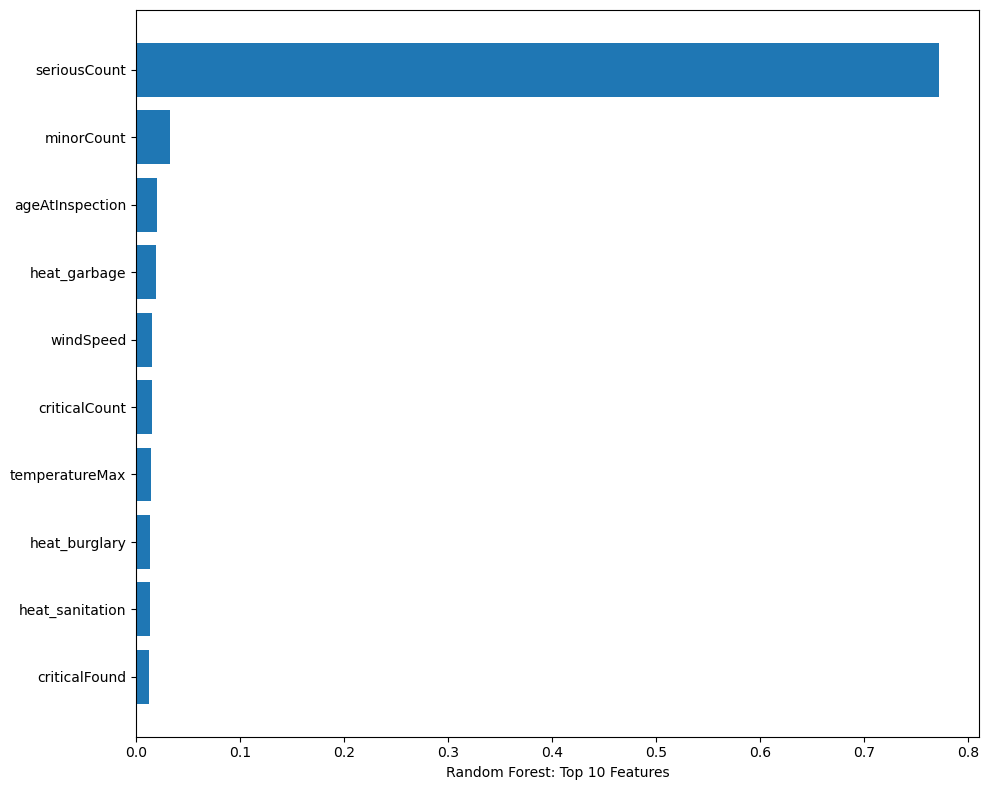

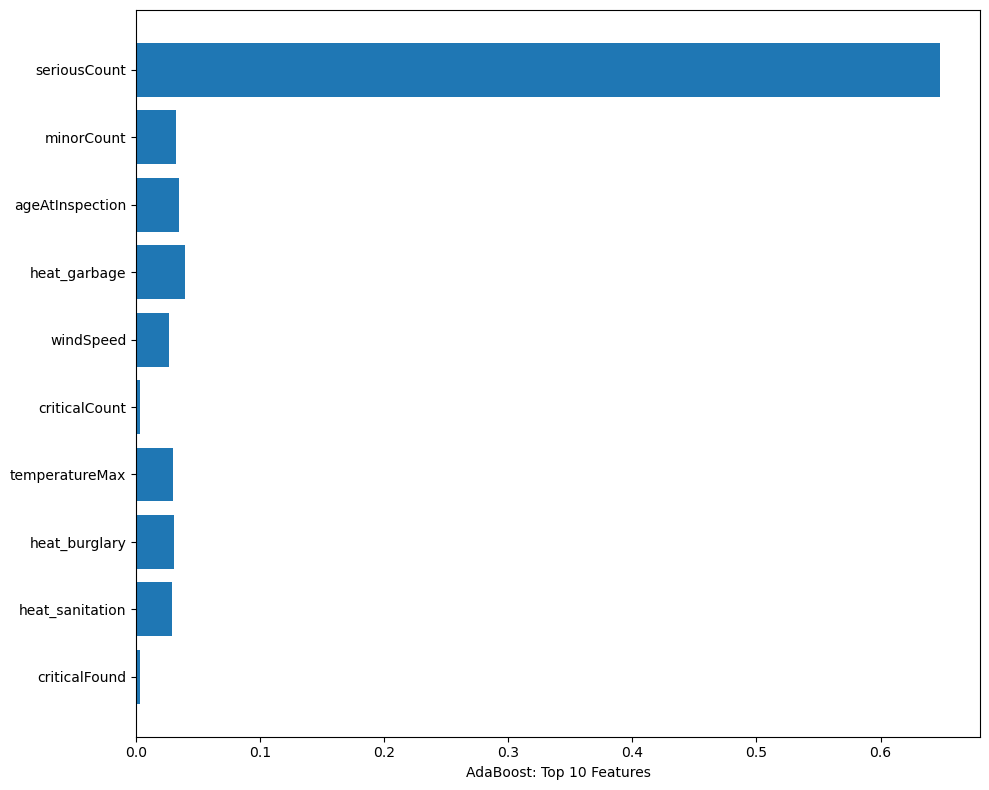

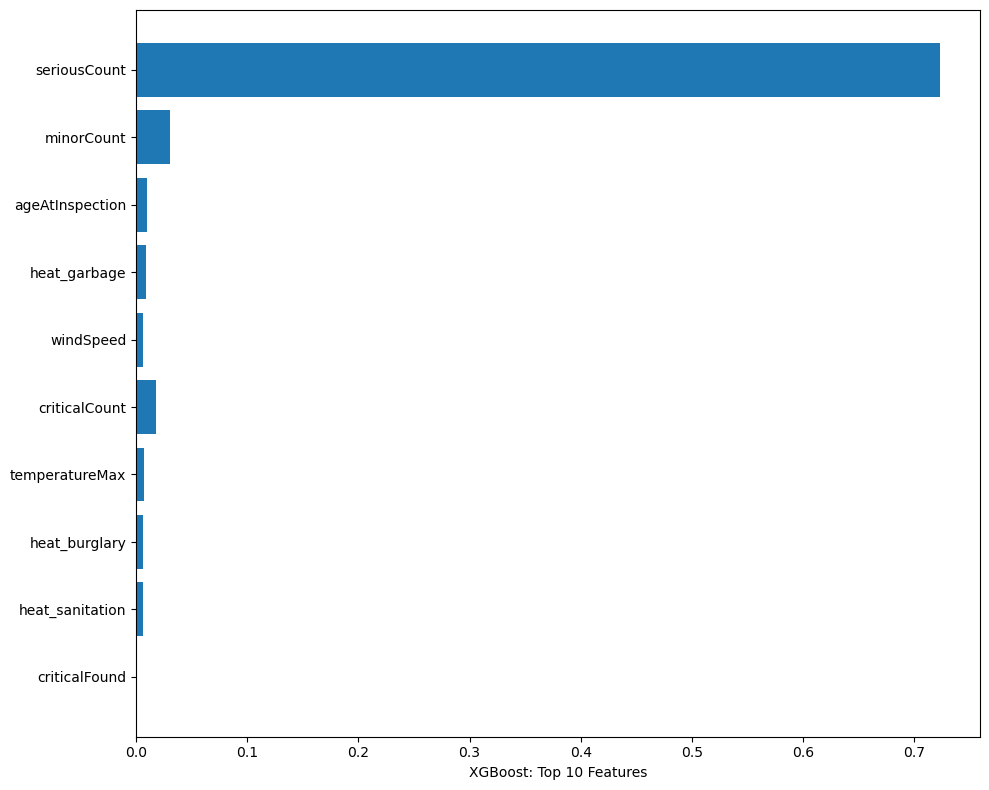


Top 10 Features:
        feature  Random Forest  AdaBoost  XGBoost
   seriousCount       0.771546  0.647751 0.723105
     minorCount       0.032608  0.032175 0.030124
ageAtInspection       0.020083  0.034535 0.009619
   heat_garbage       0.019453  0.039721 0.009293
      windSpeed       0.015490  0.026736 0.006118
  criticalCount       0.015008  0.002938 0.017729
 temperatureMax       0.014421  0.029979 0.007085
  heat_burglary       0.013585  0.030651 0.006441
heat_sanitation       0.013129  0.028848 0.005894
  criticalFound       0.012449  0.003458 0.000000


In [19]:
##Feature importance for all the models
# feature importance: Random Forest, XG Boost
# get feature importance
rf_importances = best_rf_model.feature_importances_
Ada_importances = best_Ada_model.feature_importances_
xgb_importances = best_xgb_model.feature_importances_

# create dataframe
importance_df = pd.DataFrame({
    'feature': X.columns,
    'Random Forest': rf_importances,
    'AdaBoost': Ada_importances,
    'XGBoost': xgb_importances
}).sort_values('Random Forest', ascending=False)

# plot top 10: RF
plt.figure(figsize=(10, 8))
top_10_rf = importance_df.head(10)
plt.barh(top_10_rf['feature'], top_10_rf['Random Forest'])
plt.xlabel('Random Forest: Top 10 Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# plot top 10: Adaboost
plt.figure(figsize=(10, 8))
top_10_Ada = importance_df.head(10)
plt.barh(top_10_Ada['feature'], top_10_Ada['AdaBoost'])
plt.xlabel('AdaBoost: Top 10 Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# plot top 10: XGboost
plt.figure(figsize=(10, 8))
top_10_xgb = importance_df.head(10)
plt.barh(top_10_xgb['feature'], top_10_xgb['XGBoost'])
plt.xlabel('XGBoost: Top 10 Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



# show top features
print("\nTop 10 Features:")
print(importance_df.head(10).to_string(index=False))


**Answer**: From reviewing the feature importance plots, it appears that the top features that contribute to the predictions are seriouscount and minorcount. Age at inspection seems relevant for the random forest and Adaboost model, but not as much for the XGBoost model. There's a similar story for heat_garbage feature. Wind Speed, max temperature, heat_burglary and heat_sanitation seem more important for Adaboost than for the other two models.  
It would be interesting to see how things like complaints to the BBB (Better Business Bureau) about the establishments; retention rates of employees that handle the food; and maybe even the layout of the establishments might contribute to predictions. Unfortunately, these features do not appear to be available for analysis.


### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [21]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
#Choosing model with best recall
best_model = best_rf_model

#use .predict() 
predictions = best_model.predict(X_val)
print(predictions)

# probability predictions on validation set
y_prob = best_model.predict_proba(X_val)[:, 1]

print(f"Using model: {type(best_model).__name__}")
print(f"Probability range: {y_prob.min():.3f} to {y_prob.max():.3f}")


Using model: RandomForestClassifier
Probability range: 0.000 to 0.993


In [22]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# create data frame + predictions
results_df = pd.DataFrame({
    'probability_failure': y_prob,
    'actual_failure': y_val.ravel()
})

# sort by prob. — Highest 2 Lowest (Spike Lee, 2025)
results_df_sorted = results_df.sort_values('probability_failure', ascending=False)

print("Top 5 highest-risk establishments:")
print(results_df_sorted.head())

print("\nTop 1000 highest-risk establishments:")
top_1000 = results_df_sorted.head(1000)
print(f"Total establishments: {len(results_df_sorted)}")
print(f"Selecting top 1000")

Top 5 highest-risk establishments:
      probability_failure  actual_failure
1934             0.992812               1
866              0.986129               1
2679             0.984102               1
595              0.983959               1
1248             0.982488               1

Top 1000 highest-risk establishments:
Total establishments: 3063
Selecting top 1000


In top 1000 highest-risk establishments:
 Actual failures found: 614
 False positives (predicted fail, actually pass): 386
 Recall (of all violations): 0.994


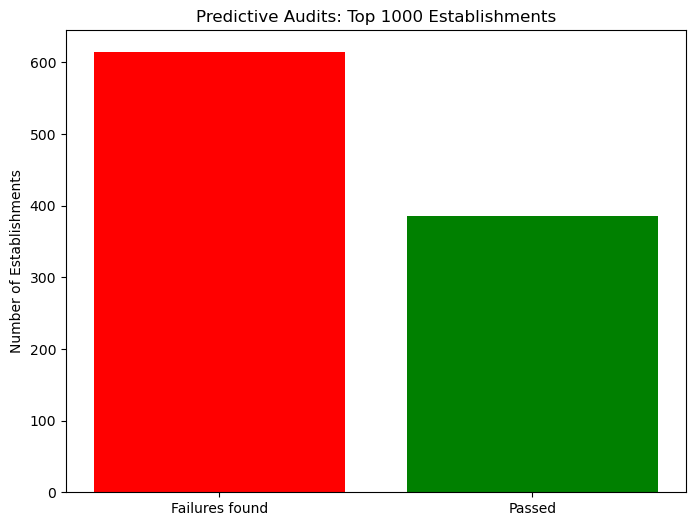

In [25]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
# count violations in top 1000
violations_found_predictive = top_1000['actual_failure'].sum()
passes_in_top1000 = 1000 - violations_found_predictive

print(f"In top 1000 highest-risk establishments:")
print(f" Actual failures found: {violations_found_predictive}")
print(f" False positives (predicted fail, actually pass): {passes_in_top1000}")
print(f" Recall (of all violations): {violations_found_predictive/y_val.sum():.3f}")

# visualize
plt.figure(figsize=(8, 6))
plt.bar(['Failures found', 'Passed'],
        [violations_found_predictive, passes_in_top1000],
        color=['red', 'green'])
plt.title('Predictive Audits: Top 1000 Establishments')
plt.ylabel('Number of Establishments')
plt.show()

In [34]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
# simulate random audits 100x
random_violations = []

for i in range(100):
    random_sample = results_df.sample(1000, random_state=i)
    violations = random_sample['actual_failure'].sum()
    random_violations.append(violations)

# calc mean
avg_random_violations = np.mean(random_violations)
std_random_violations = np.std(random_violations)

print(f"\nRandom Audits (100):")
print(f" Average failures found: {avg_random_violations:.1f}")
print(f" Standard deviation: {std_random_violations:.1f}")

# compare
improvement = ((violations_found_predictive - avg_random_violations) / avg_random_violations) * 100

print(f"\n{'='*50}")
print(f"Comparison:")
print(f" Predictive auditing: {violations_found_predictive} violations")
print(f" Improvement: {improvement:.1f}%")
print(f"{'='*50}")


Random Audits (100):
 Average failures found: 201.4
 Standard deviation: 10.1

Comparison:
 Predictive auditing: 614 violations
 Improvement: 204.8%



From the values above it seems like predictive auditing perfoms a lot better than random auditing.

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [36]:
# data processing
# -----------
# reload 2014 data
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv", 
                                       low_memory=False)
# convert date
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(
    chicago_inspections_2014['Inspection_Date']
)

# drop date columns
chicago_inspections_2014 = chicago_inspections_2014.drop(columns=[
    'Inspection_Date', 'minDate', 'maxDate'
], errors='ignore')

# drop ID & geographic columns
chicago_inspections_2014 = chicago_inspections_2014.drop(columns=[
    'AKA_Name', 'License', 'Address', 'City', 'State', 'Zip',
    'Latitude', 'Longitude', 'Location', 'ID', 'LICENSE_ID',
    'LICENSE_TERM_START_DATE', 'LICENSE_TERM_EXPIRATION_DATE',
    'LICENSE_STATUS', 'ACCOUNT_NUMBER', 'LEGAL_NAME',
    'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE',
    'ZIP_CODE', 'WARD', 'PRECINCT', 'LICENSE_CODE',
    'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
    'LATITUDE', 'LONGITUDE', 'pass_flag', 'fail_flag'
], errors='ignore')

# drop NAs
chicago_inspections_2014 = chicago_inspections_2014.dropna()

# process features
#remove the results column from feature data
X_test2014 = chicago_inspections_2014.drop(columns=['Results'])

X_test2014 = pd.get_dummies(X_test2014)

# align columns w/training data
# add missing columns w/0s
for col in X_train.columns:
    if col not in X_test_2014.columns:
        X_test_2014[col] = 0

# remove extraneous columns
X_test2014 = X_test2014[X_train.columns]

# process target 
y_test2014 = chicago_inspections_2014['Results']
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)
y_test2014 = np.where(y_test2014 == 1, 0, 1).ravel()

print(f"2014 test set size: {X_test2014.shape}")
print(f"Number of failures in 2014: {y_test2014.sum()}")
print(f"Failure rate: {y_test2014.mean():.3f}")

2014 test set size: (3937, 41)
Number of failures in 2014: 784
Failure rate: 0.199


In [38]:
# predict and compare 
# -----------
# predictions based on 2014 data
y_pred2014 = best_model.predict(X_test_2014)

print(f"Predictions made: {len(y_pred2014)}")
print(f"Predicted failures: {y_pred2014.sum()}")

Predictions made: 3937
Predicted failures: 984



2014 Test Set Performance:
Accuracy............ 0.901
Precision........... 0.700
Recall.............. 0.879
F1 Score............ 0.779


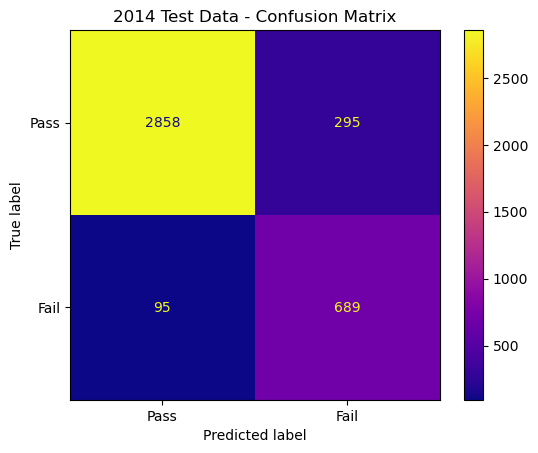


Confusion Matrix Breakdown:
  True Negatives (correctly predicted Pass): 2858
  False Positives (predicted Fail, actually Pass): 295
  False Negatives (predicted Pass, actually Fail): 95
  True Positives (correctly predicted Fail): 689


In [48]:
# evaluate
# -----------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
test_metrics = {
    'Accuracy': accuracy_score(y_test2014, y_pred2014),
    'Precision': precision_score(y_test2014, y_pred2014),
    'Recall': recall_score(y_test2014, y_pred2014),
    'F1 Score': f1_score(y_test2014, y_pred2014)
}

print("\n2014 Test Set Performance:")
print("="*50)
for metric, score in test_metrics.items():
    print(f"{metric:.<20} {score:.3f}")
print("="*50)

# Confusion matrix
cm = confusion_matrix(y_test2014, y_pred2014)
disp = ConfusionMatrixDisplay(cm, display_labels=['Pass', 'Fail'])
disp.plot(cmap='plasma')
plt.title('2014 Test Data - Confusion Matrix')
plt.show()

# Interpretation
print("\nConfusion Matrix Breakdown:")
print(f"  True Negatives (correctly predicted Pass): {cm[0,0]}")
print(f"  False Positives (predicted Fail, actually Pass): {cm[0,1]}")
print(f"  False Negatives (predicted Pass, actually Fail): {cm[1,0]}")
print(f"  True Positives (correctly predicted Fail): {cm[1,1]}")


Here, we will be prioritizing the recall metric. As mentioned in section 3.3, recall lets us know how many real violations we correctly identify and minimizes the false negatives. A recall rate of 87.9% is not bad, however it is worse than the performance we had seen for the training data (Average recall: 92.2%). I think I would want a model with a recall rate that was over 90% to recommend for implementation.
I also wonder if simplifying the model by training a new decision tree using only the 10 most important features would improve the metrics here.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**ANSWER:**
We need metrics beyond accuracy because accuracy doesn't tell the full story and may not reflect the goals of the researcher and/or stakeholders. As we saw in this context of food inspection violations, recall was the most relevant metric to prioritize. In a criminal justice context, precision scores may be what we want to focus on. The decisions we make based on these metrics can have real consequences for real people. As mentioned earlier, more false negatives pose health and safety concerns. This is why it is important for us to determine which metrics are most relevant for the question/issue at hand.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**ANSWER:**
One way to address the potential issue of establishments attempting to adjust their behavior to avoid detection is by not fully relying on the algorithm to decide which establishments to audit. While it may be enticing for policymakers to use the algorithm as the final say on which establishments to audit based on cost and other efficiency-related reasons, the real world behavior of the establishments may reduce their effectiveness. I would propose that 70 - 80% of the audits come from this algorithm and the remaining percentage of audits can be conducted using prior methods of randomization. This will ensure that a good percentage of high-risk establishments get inspected and potentially keep other establishments on their best behavior. 
This change in real world behavior can be classified as drift (when the data that the model was trained on starts changing). Another option for situations like this would be for policymakers to retrain the algorithm every 3-5 years to see if the same or different features are relevant and whether the same or new establishments are predicted to be in violation and adjust accordingly